<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/violence11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# !apt-get -qq install python-cartopy python3-cartopy
# !pip uninstall -y shapely;    # cartopy and shapely aren't friends (early 2020)
# !pip install shapely --no-binary shapely;
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.io.shapereader as shpreader

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/My Drive/ethnic_violence/globalterrorismdb_0919dist.xlsx')

In [6]:
# save the data pertaining the Eelam War I in Sri Lanka as a separate dataframe
condition = ((df.country_txt == 'Sri Lanka') & (df.iyear >= 1983) & (df.iyear <= 1987))
df_sl_first = df[condition]

In [7]:
df_sl_first = df_sl_first[df_sl_first.latitude.notnull()]

In [8]:
lat = df_sl_first['latitude'].values
lon = df_sl_first['longitude'].values
causalities = df_sl_first['nkill'].values
# attack_type = df_sl_first['attacktype1_txt'].values

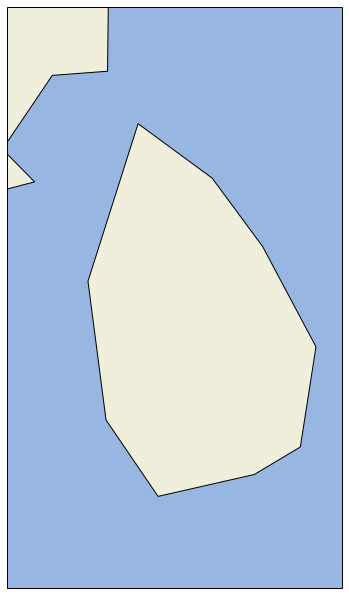

In [66]:
central_lat = 7.8731
central_lon = 80.7718
extent = [79, 82, 5, 11]

plt.figure(figsize=(6, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')

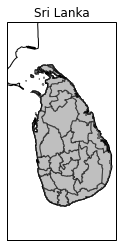

<Figure size 432x864 with 0 Axes>

In [39]:
# downloaded from https://gadm.org/download_country_v3.html
fname = '/content/drive/My Drive/cartopy/gadm36_LKA_shp/gadm36_LKA_1.shp'

shapes = list(shpreader.Reader(fname).geometries())

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Sri Lanka')
plt.figure(figsize=(6, 12))
ax.coastlines(resolution='10m')

ax.add_geometries(shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([79, 82, 5, 11], ccrs.PlateCarree())

plt.show()

In [62]:
lat = df_sl_first['latitude'].values
lon = df_sl_first['longitude'].values
causalities = df_sl_first['nkill'].values

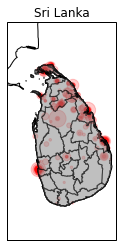

<Figure size 864x1296 with 0 Axes>

In [65]:
shapes = list(shpreader.Reader(fname).geometries())

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Sri Lanka')
plt.figure(figsize=(12, 18))
ax.coastlines(resolution='10m')

ax.add_geometries(shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([79, 82, 5, 11], ccrs.PlateCarree())

ax.scatter(lon, lat,
          s=causalities*2+5,
          alpha=0.2,
          c='Red')

plt.show()

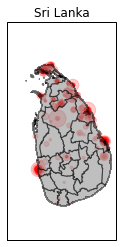

<Figure size 864x1296 with 0 Axes>

In [73]:
shapes = list(shpreader.Reader(fname).geometries())

ax = plt.axes(projection=ccrs.AlbersEqualArea())

plt.title('Sri Lanka')
plt.figure(figsize=(12, 18))
ax.coastlines(resolution='10m')

ax.add_geometries(shapes, ccrs.AlbersEqualArea(),
                  edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([79, 82, 5, 11], ccrs.AlbersEqualArea())

ax.scatter(lon, lat,
          s=causalities*2+5,
          alpha=0.2,
          c='Red')

plt.show()